In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
from scipy.stats import ttest_ind

data_url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"


df = pd.read_csv(data_url)

df


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
df[(df['Year'].isnull()) | (df['Genre'].isnull()) |(df['Publisher'].isnull()) ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [5]:
# 중요자료라면 결측치를 하나하나 넣어줄수 있으나 그렇게 많은 결측치도 아니라서 제거하기로 한다.
df=df.dropna()
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [6]:
# 인덱스 정렬 후 sales 의 데이터 변환이 필요. M = 1000000, k = 1000
# 기본이 백만단위
def MKchanger(x):
  if str(x).find("K") != -1:                                     # 원하는 문자의 위치를 찾아주는데 없으면 -1을 리턴 
    return float(str(x).split("K")[0].replace('.',''))*1000
  elif str(x).find("M") != -1:
    return float(str(x).split("M")[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:      # 각 대륙의 판매량마다 함수를 넣어 변경
  df[i] = df[i].apply(MKchanger)


print(df.dtypes)
df.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0


In [7]:
df[(df['Year'] < 1950)]


#Year이 4자리로 안되어있는 데아터 100개 발견. 수정

def ychanger(x):
  if float(x) < 50:
    return float(x)+2000 
  elif ((x > 50.0) & ( x < 1950.0)):
    return float(x)+1900
  else:
    return float(x)



for i in ['Year']:     
  df[i] = df[i].apply(ychanger)

df



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,15000000.0,4000000.0,0.0,1000000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,1000000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,44000000.0,19000000.0,3000000.0,13000000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,5000000.0,5000000.0,25000000.0,3000000.0


In [8]:
#열에 대하여 오름차순으로 정렬
df= df.sort_values(['Year'], ascending=False)   # (ascending = False) 내림차순

df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,27000000.0,0.0,0.0,2000000.0
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,3000000.0,0.0
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,1000000.0,0.0
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,1000000.0,0.0
4,Hatsune Miku: Project Diva X,PS4,2016.0,Misc,Sega,1000000.0,0.0,2000000.0,0.0
...,...,...,...,...,...,...,...,...,...
16236,Boxing,2600,1980.0,Fighting,Activision,72000000.0,4000000.0,0.0,1000000.0
16237,Checkers,2600,1980.0,Misc,Atari,22000000.0,1000000.0,0.0,0.0
16238,Defender,2600,1980.0,Misc,Atari,99000000.0,5000000.0,0.0,1000000.0
16239,Kaboom!,2600,1980.0,Misc,Activision,107000000.0,7000000.0,0.0,1000000.0


In [9]:
#가장 최근에 발매한 순으로 역순
df_1=df.copy()
df_1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,27000000.0,0.0,0.0,2000000.0
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,3000000.0,0.0
2,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,1000000.0,0.0
3,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,1000000.0,0.0
4,Hatsune Miku: Project Diva X,PS4,2016.0,Misc,Sega,1000000.0,0.0,2000000.0,0.0
...,...,...,...,...,...,...,...,...,...
16236,Boxing,2600,1980.0,Fighting,Activision,72000000.0,4000000.0,0.0,1000000.0
16237,Checkers,2600,1980.0,Misc,Atari,22000000.0,1000000.0,0.0,0.0
16238,Defender,2600,1980.0,Misc,Atari,99000000.0,5000000.0,0.0,1000000.0
16239,Kaboom!,2600,1980.0,Misc,Activision,107000000.0,7000000.0,0.0,1000000.0


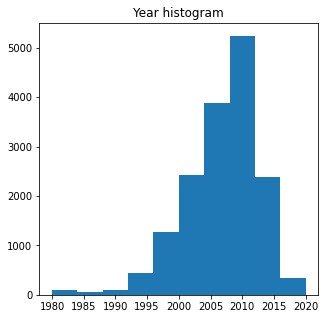

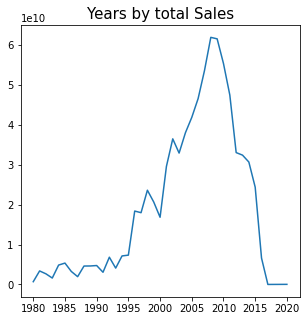

In [10]:
# 데이터 분석 시작 
# 각 연도별 가장 많이 발매된 장르 확인 

#각 판매량을 다 합친 global_sale 열 생성

df_1['Global_Sales'] = df_1['NA_Sales']+df_1['EU_Sales']+df_1['JP_Sales']+df_1['Other_Sales']



plt.subplots(1,1, figsize = (5,5))
plt.hist(df['Year'])
plt.title('Year histogram')  # 연도별 게임 발매량
plt.show();

plt.subplots(1,1, figsize = (5,5))
plt.plot(df_1.groupby('Year')['Global_Sales'].sum())  # 연도별 게임 총 판매량
plt.title(str("Years by total Sales"),fontsize=15)
plt.show();

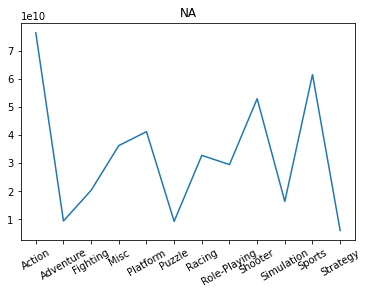

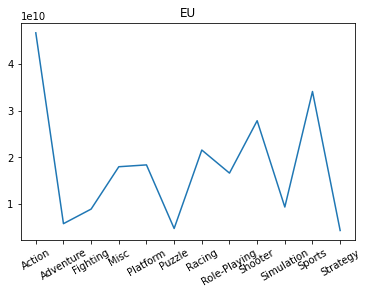

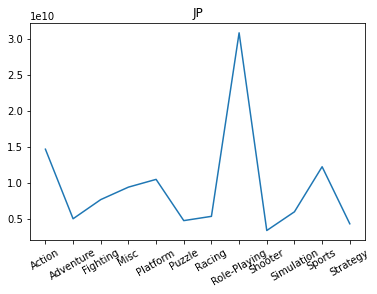

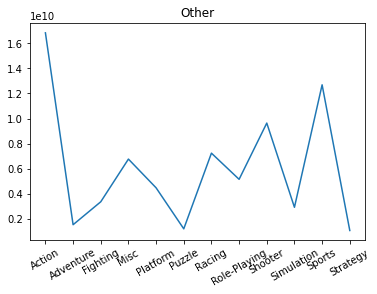

In [11]:
group = df_1.groupby("Genre").sum()
plt.plot(group['NA_Sales'])
plt.title("NA")
plt.xticks(rotation=30)
plt.show();
plt.plot(group['EU_Sales'])
plt.title("EU")
plt.xticks(rotation=30)
plt.show();
plt.plot(group['JP_Sales'])
plt.title("JP")
plt.xticks(rotation=30)
plt.show();
plt.plot(group['Other_Sales'])
plt.title("Other")
plt.xticks(rotation=30)
plt.show();

#Na 1순위 Action 2순위 Sports 3순위 Shooter 
#EU 1순위 Action 2순위 Sports 3순위 Shooter 
#JP 1순위 Role-playing 2순위 Action 3순위 Sports 
#Other 1순위 Action 2순위 Sports 3순위 Shooter 
# JP가 다른나라와 다른 양상. 확인해보자.

In [13]:
#일본이랑 다른 나라랑 차이가 많이 심한가? a/b test를 위해 옵티마이즈 사이트를 통해 통계값 확인   Conversion Rate가 12%이고 95%의 통계적 유의미함을 확인하기 위해서 최소 13000개의 데이터가 필요하다. 
#https://www.optimizely.com/sample-size-calculator/?conversion=3&effect=20&significance=95
result_1 = stats.ttest_ind(group['JP_Sales'],group['Global_Sales'] ,equal_var=False)
print("평균 JP가 Global보다 크다에 대한 t검정 통계량: %.3f, pvalue=%.3f"%(result_1))

result_1 = stats.ttest_ind(group['JP_Sales'],group['NA_Sales'] ,equal_var=False)
print("평균 JP가 NA보다 크다에 대한 t검정 통계량: %.3f, pvalue=%.3f"%(result_1))

result_1 = stats.ttest_ind(group['JP_Sales'],group['EU_Sales'] ,equal_var=False)
print("평균 JP가 EU보다 크다에 대한 t검정 통계량: %.3f, pvalue=%.3f"%(result_1))

result_1 = stats.ttest_ind(group['JP_Sales'],group['Other_Sales'] ,equal_var=False)
print("평균 JP가 Other보다 크다에 대한 t검정 통계량: %.3f, pvalue=%.3f"%(result_1))

# 결과값에 대한 확신이 없다. 

평균 JP가 Global보다 크다에 대한 t검정 통계량: -4.524, pvalue=0.001
평균 JP가 NA보다 크다에 대한 t검정 통계량: -3.418, pvalue=0.004
평균 JP가 EU보다 크다에 대한 t검정 통계량: -1.973, pvalue=0.064
평균 JP가 Other보다 크다에 대한 t검정 통계량: 1.303, pvalue=0.208


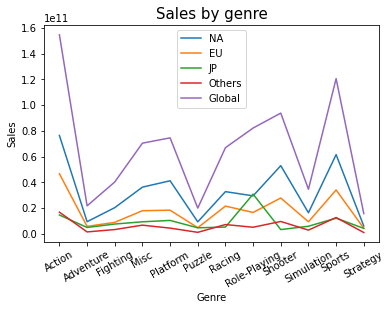

In [14]:
# 지역별 게임 판매량 분포 확인
group = df_1.groupby("Genre").sum()
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.plot(group['Other_Sales'],label="Others")
plt.plot(group['Global_Sales'],label="Global")
plt.xlabel('Genre',fontsize=10)
plt.ylabel('Sales',fontsize=10)
plt.xticks(rotation=30)
plt.title("Sales by genre",fontsize=15)

plt.legend()
plt.show();

# 1순위 Action
# 2순위 Sports
# 3순위 Shooter

In [15]:
group_year = df_1.groupby('Year', as_index = False).sum()
group_year['Global_Sales'] = group_year.sum(axis = 1)
group_year


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,6.170000e+08,6.400000e+07,0.000000e+00,1.100000e+07,1.384002e+09
1,1981.0,3.178000e+09,1.761100e+08,0.000000e+00,3.200000e+07,6.772222e+09
2,1982.0,2.476000e+09,1.560000e+08,0.000000e+00,3.100000e+07,5.326002e+09
3,1983.0,7.760000e+08,7.100000e+07,7.470000e+08,1.400000e+07,3.216002e+09
4,1984.0,3.256000e+09,2.010000e+08,1.328000e+09,7.000000e+07,9.710002e+09
5,1985.0,3.373000e+09,4.650000e+08,1.420000e+09,9.200000e+07,1.070000e+10
6,1986.0,1.250000e+09,2.840000e+08,1.531000e+09,1.930000e+08,6.516002e+09
7,1987.0,7.920000e+08,9.600000e+07,1.046000e+09,2.000000e+07,3.908002e+09
8,1988.0,2.369000e+09,6.590000e+08,1.513000e+09,7.119000e+07,9.224382e+09
9,1989.0,2.349060e+09,7.900000e+08,1.359000e+09,1.320000e+08,9.260122e+09


In [16]:
df_gb = df_1.groupby(['Year', 'Genre'],as_index = False).sum()
df_gb['Global_Sales'] =  df_gb['NA_Sales']+df_gb['EU_Sales']+df_gb['JP_Sales']+df_gb['Other_Sales']
df_gb_Action = df_gb[(df_gb['Genre']== 'Action')]
df_gb_Fighting = df_gb[(df_gb['Genre']== 'Fighting')]
df_gb_Adventure = df_gb[(df_gb['Genre']== 'Adventure')]
df_gb_Misc = df_gb[(df_gb['Genre']== 'Misc')]
df_gb_Platform = df_gb[(df_gb['Genre']== 'Platform')]
df_gb_Puzzle = df_gb[(df_gb['Genre']== 'Puzzle')]
df_gb_Racing = df_gb[(df_gb['Genre']== 'Racing')]
df_gb_RolePlaying = df_gb[(df_gb['Genre']== 'Role-Playing')]
df_gb_Shooter = df_gb[(df_gb['Genre']== 'Shooter')]
df_gb_Simulation = df_gb[(df_gb['Genre']== 'Simulation')]
df_gb_Sports = df_gb[(df_gb['Genre']== 'Sports')]
df_gb_Strategy = df_gb[(df_gb['Genre']== 'Strategy')]

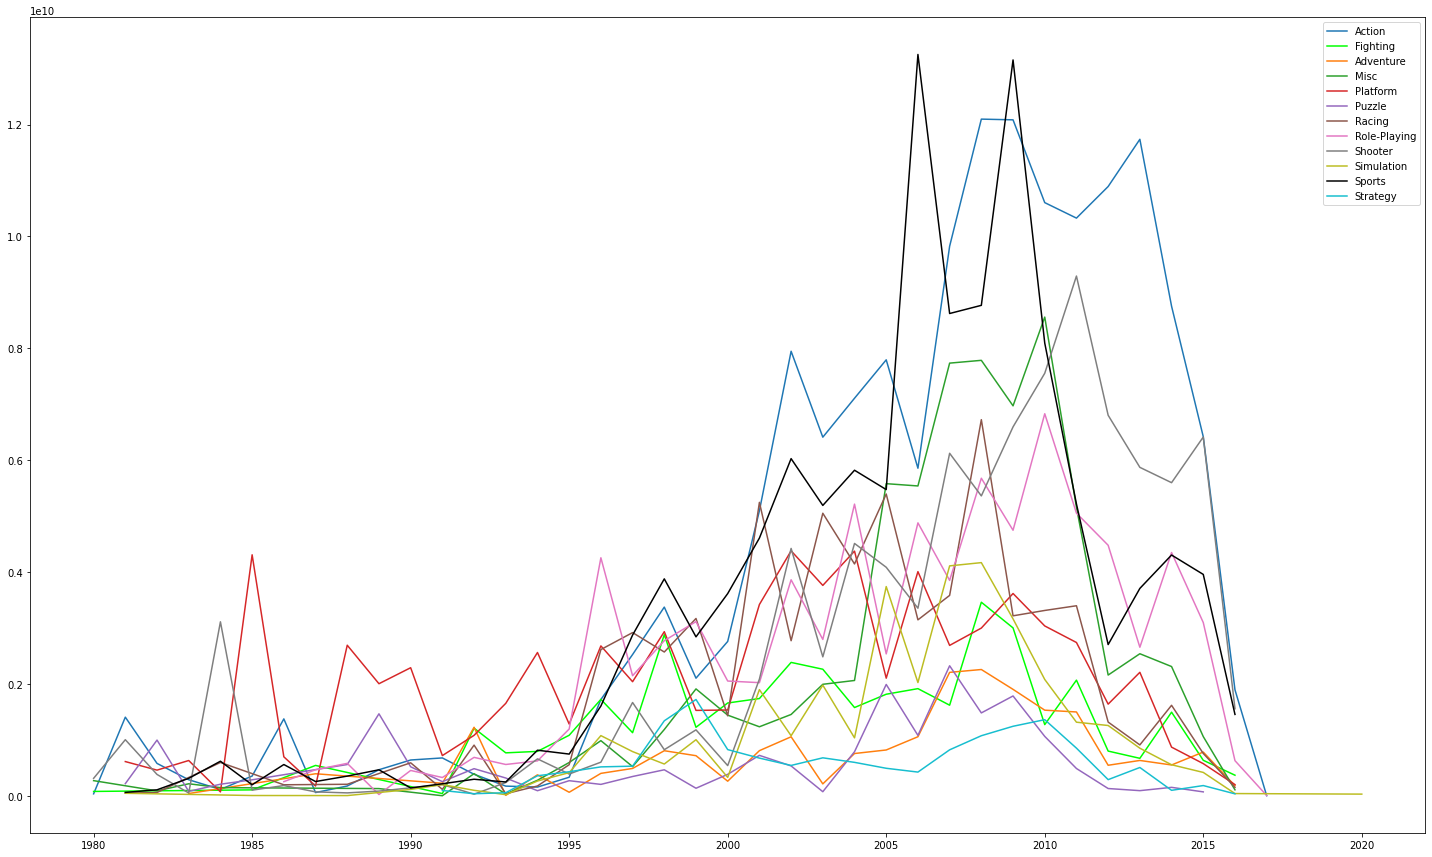

In [17]:
plt.figure(figsize=(25,15))
plt.plot(df_gb_Action['Year'],df_gb_Action['Global_Sales'],label = 'Action')
plt.plot(df_gb_Fighting['Year'],df_gb_Fighting['Global_Sales'], label = 'Fighting', color = "lime")
plt.plot(df_gb_Adventure['Year'],df_gb_Adventure['Global_Sales'], label = 'Adventure')
plt.plot(df_gb_Misc['Year'],df_gb_Misc['Global_Sales'], label = 'Misc')
plt.plot(df_gb_Platform['Year'],df_gb_Platform['Global_Sales'], label = 'Platform')
plt.plot(df_gb_Puzzle['Year'],df_gb_Puzzle['Global_Sales'], label = 'Puzzle')
plt.plot(df_gb_Racing['Year'],df_gb_Racing['Global_Sales'], label = 'Racing')
plt.plot(df_gb_RolePlaying['Year'],df_gb_RolePlaying['Global_Sales'], label = 'Role-Playing')
plt.plot(df_gb_Shooter['Year'],df_gb_Shooter['Global_Sales'], label = 'Shooter')
plt.plot(df_gb_Simulation['Year'],df_gb_Simulation['Global_Sales'], label = 'Simulation')
plt.plot(df_gb_Sports['Year'],df_gb_Sports['Global_Sales'], label = 'Sports', color = "black")
plt.plot(df_gb_Strategy['Year'],df_gb_Strategy['Global_Sales'], label = 'Strategy')

plt.legend()
plt.show();


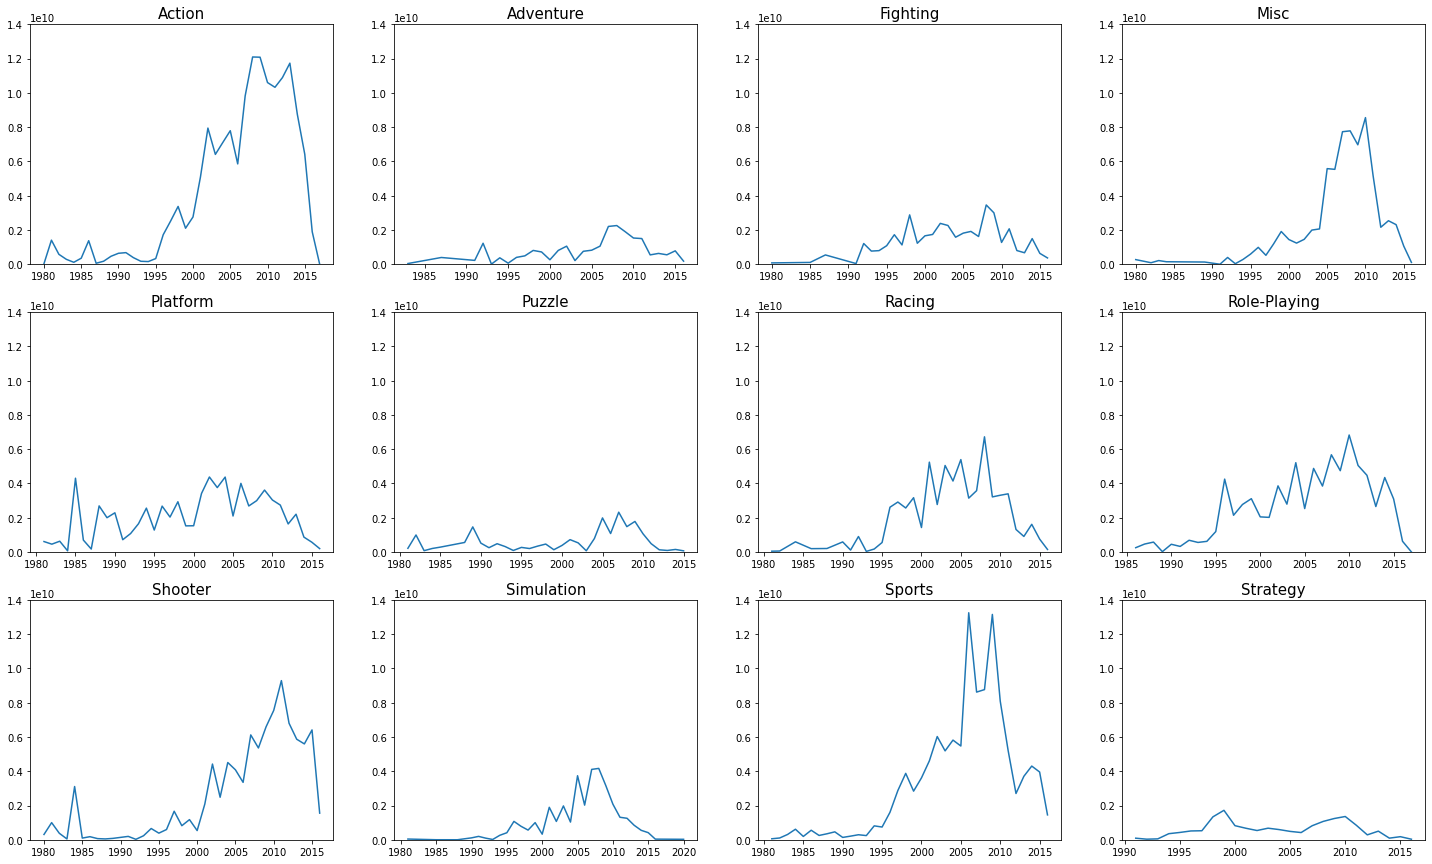

In [18]:
plt.figure(figsize=(25,15))
plt.subplot(3,4,1)
plt.plot(df_gb_Action['Year'],df_gb_Action['Global_Sales'])
plt.title(str("Action"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,2)
plt.plot(df_gb_Adventure['Year'],df_gb_Adventure['Global_Sales'])
plt.title(str("Adventure"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,3)
plt.plot(df_gb_Fighting['Year'],df_gb_Fighting['Global_Sales'])
plt.title(str("Fighting"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,4)
plt.plot(df_gb_Misc['Year'],df_gb_Misc['Global_Sales'])
plt.title(str("Misc"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,5)
plt.plot(df_gb_Platform['Year'],df_gb_Platform['Global_Sales'])
plt.title(str("Platform"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,6)
plt.plot(df_gb_Puzzle['Year'],df_gb_Puzzle['Global_Sales'])
plt.title(str("Puzzle"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,7)
plt.plot(df_gb_Racing['Year'],df_gb_Racing['Global_Sales'])
plt.title(str("Racing"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,8)
plt.plot(df_gb_RolePlaying['Year'],df_gb_RolePlaying['Global_Sales'])
plt.title(str("Role-Playing"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,9)
plt.plot(df_gb_Shooter['Year'],df_gb_Shooter['Global_Sales'])
plt.title(str("Shooter"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,10)
plt.plot(df_gb_Simulation['Year'],df_gb_Simulation['Global_Sales'])
plt.title(str("Simulation"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,11)
plt.plot(df_gb_Sports['Year'],df_gb_Sports['Global_Sales'])
plt.title(str("Sports"),fontsize=15)
plt.ylim(0,14000000000)
plt.subplot(3,4,12)
plt.plot(df_gb_Strategy['Year'],df_gb_Strategy['Global_Sales'])
plt.title(str("Strategy"),fontsize=15)
plt.ylim(0,14000000000)

plt.show();


In [19]:
# 같은 게임이라도 플랫폼에 따라 판매량이 다르기 때문에 조사
df_game = df.groupby('Name', as_index = False).sum()

df_game['Global_Sales'] =  df_game['NA_Sales']+df_game['EU_Sales']+df_game['JP_Sales']+df_game['Other_Sales']

df_game = df_game.sort_values(by = 'Global_Sales', ascending = False)

df_name = df.loc[:,['Name','Publisher','Platform']]
df_name = df_name.drop_duplicates('Name', keep = 'first')

df_game = df_game.drop_duplicates('Name', keep = 'first')
df_game = pd.merge(df_game, df_name, how = 'left', on = 'Name')
df_game = df_game.reset_index(drop = True)
df_game.head(100)

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher,Platform
0,Wii Sports,2006.0,4.149000e+09,2.902000e+09,377000000.0,846000000.0,8.274000e+09,Nintendo,Wii
1,Grand Theft Auto V,10069.0,2.004000e+09,2.304000e+09,139000000.0,803000000.0,5.250000e+09,Take-Two Interactive,PC
2,Super Mario Bros.,3984.0,2.942000e+09,3.710000e+08,696000000.0,99000000.0,4.108000e+09,Nintendo,GB
3,Mario Kart Wii,2008.0,1.585000e+09,1.288000e+09,379000000.0,331000000.0,3.583000e+09,Nintendo,Wii
4,Wii Sports Resort,2009.0,1.575000e+09,1.101000e+09,328000000.0,296000000.0,3.300000e+09,Nintendo,Wii
...,...,...,...,...,...,...,...,...,...
95,Super Mario Kart,1992.0,3.540000e+08,1.240000e+08,381000000.0,18000000.0,8.770000e+08,Nintendo,SNES
96,Star Wars: The Force Unleashed,12048.0,5.320000e+08,1.440000e+08,1000000.0,191000000.0,8.680000e+08,LucasArts,Wii
97,FIFA Soccer 09,12048.0,1.700000e+08,4.020000e+08,8000000.0,286000000.0,8.660000e+08,Electronic Arts,PS2
98,Assassin's Creed II,6028.0,2.860000e+08,3.960000e+08,29000000.0,149000000.0,8.600000e+08,Ubisoft,PC


In [20]:

df_Pu_top100=pd.DataFrame(df_game.head(100).value_counts('Publisher'))

df_Pu_top100

,0
Publisher,
Nintendo,38
Electronic Arts,15
Activision,12
Sony Computer Entertainment,7
Ubisoft,7
Microsoft Game Studios,6
Take-Two Interactive,6
Bethesda Softworks,3
LucasArts,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


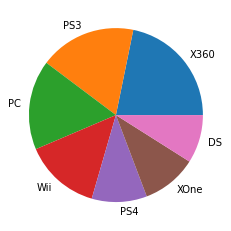

In [21]:
df_game = df.groupby('Name', as_index = False).sum()

df_game['Global_Sales'] =  df_game['NA_Sales']+df_game['EU_Sales']+df_game['JP_Sales']+df_game['Other_Sales']

df_game = df_game.sort_values(by = 'Global_Sales', ascending = False)
df_genre = df_game
df_name = df.loc[:,['Name','Publisher','Platform']]
df_genre = pd.merge(df_game, df_name, how = 'left', on = 'Name')
df_genre = df_genre.reset_index(drop = True)
df_genre.head(100)


df_Pl_top100= pd.DataFrame(df_genre.head(100).value_counts('Platform'))
df_Pl_top100.head(7)
labels = ["X360", "PS3","PC","Wii","PS4", "XOne","DS"]
plt.pie(df_Pl_top100.head(7), labels= labels);
plt.show()